In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import neighbors

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [8]:
book = pd.read_csv('books.csv', error_bad_lines=False)
book.head(3)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic


## Data Exploration
---

In [9]:
book.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [10]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [11]:
book.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


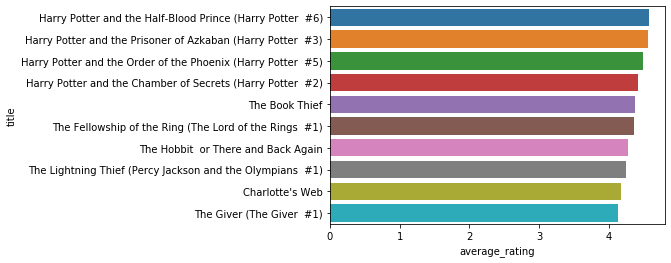

In [19]:
tops = book[book['ratings_count'] > 1000000]

top_ten = tops.sort_values(by='average_rating', ascending=False).head(10)

sns.barplot(x='average_rating', y='title', data=top_ten)

In [23]:
book[book['average_rating'] == 5.0][['title', 'average_rating', 'ratings_count']]

,title,average_rating,ratings_count
624,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,5.0,0
786,Willem de Kooning: Late Paintings,5.0,1
855,Literature Circle Guide: Bridge to Terabithia:...,5.0,4
1243,Middlesex Borough (Images of America: New Jersey),5.0,2
4125,Zone of the Enders: The 2nd Runner Official St...,5.0,2
4788,The Diamond Color Meditation: Color Pathway to...,5.0,5
4933,Bulgakov's the Master and Margarita: The Text ...,5.0,4
5023,The Complete Theory Fun Factory: Music Theory ...,5.0,1
5474,The Goon Show Volume 4: My Knees Have Fallen ...,5.0,3
5476,The Goon Show Volume 11: He's Fallen in the W...,5.0,2


With this we see that all the books we have with a perfect score (5.0) are ratings from a maximum of 5 people, so it does not generate reliability.

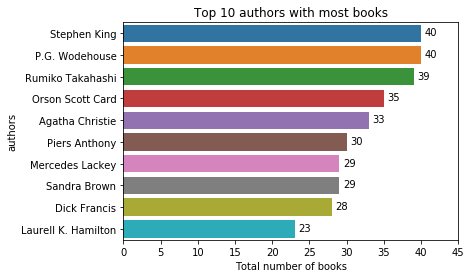

In [63]:
most_booksXauthor = book.groupby('authors')['title'].count().reset_index().sort_values(by='title', ascending=False).head(10)

ax = sns.barplot(x='title', y='authors', data=most_booksXauthor)
ax.set_title("Top 10 authors with most books")
ax.set_xlabel('Total number of books')
ax.set_xlim(0,45)

for i in ax.patches:
    ax.text(i.get_width()+.5, i.get_y()+.5, str(int(i.get_width())))

plt.show()

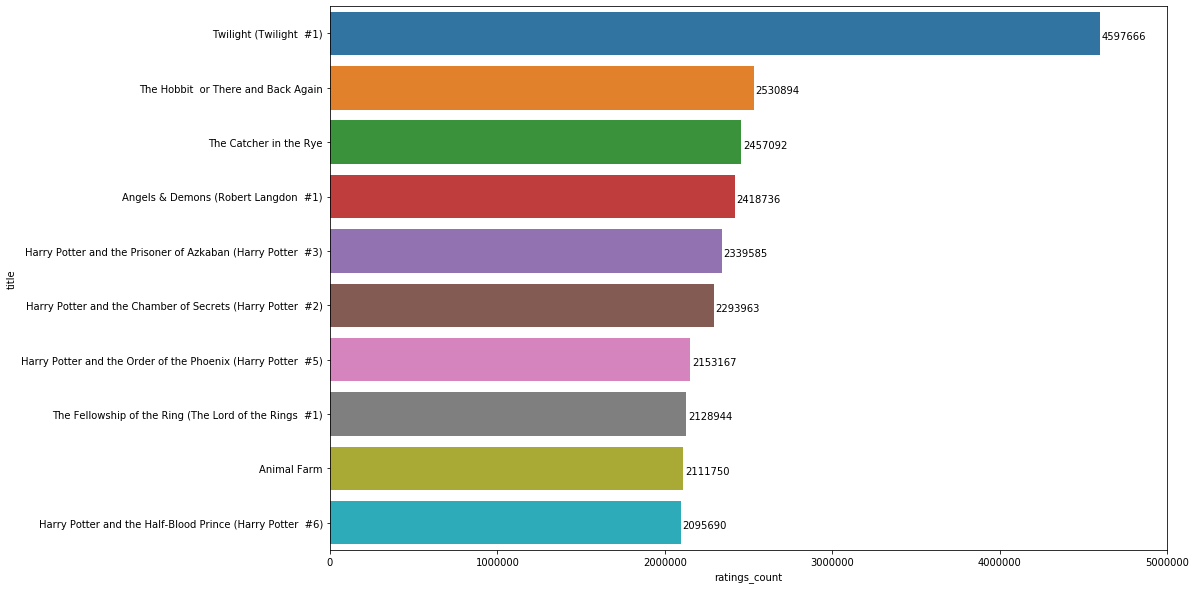

In [79]:
most_rated = book.sort_values('ratings_count', ascending=False).head(10)

plt.figure(figsize=(15,10))
ax = sns.barplot(x='ratings_count', y='title', data=most_rated)
ax.set_xlim(0,5000000)

for i in ax.patches:
    ax.text(i.get_width()+ 10000, i.get_y()+.5, str(int(i.get_width())))

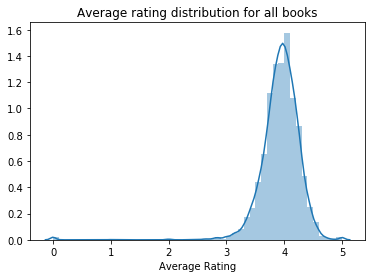

In [85]:
ax = sns.distplot(book['average_rating'])
ax.set_xlabel("Average Rating")
ax.set_title("Average rating distribution for all books")
plt.show()

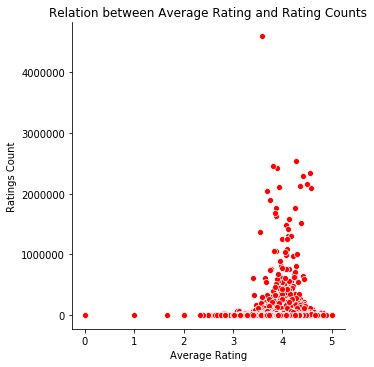

In [95]:
ax = sns.relplot(data=book, x='average_rating', y="ratings_count", color='red')
plt.title("Relation between Average Rating and Rating Counts")
ax.set_axis_labels("Average Rating", "Ratings Count")
plt.show()

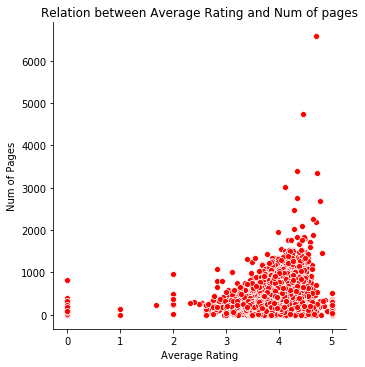

In [97]:
ax = sns.relplot(data=book, x='average_rating', y="  num_pages", color='red')
plt.title("Relation between Average Rating and Num of pages")
ax.set_axis_labels("Average Rating", "Num of Pages")
plt.show()

## Data Preparation
---

In [98]:
df = book.copy()

In [99]:
df.loc[(df['average_rating'] >= 0) & (df['average_rating'] <= 1), 'rating_between'] = 'between 0 and 1'
df.loc[(df['average_rating'] > 1) & (df['average_rating'] <= 2), 'rating_between'] = 'between 1 and 2'
df.loc[(df['average_rating'] > 2) & (df['average_rating'] <= 3), 'rating_between'] = 'between 2 and 3'
df.loc[(df['average_rating'] > 3) & (df['average_rating'] <= 4), 'rating_between'] = 'between 3 and 4'
df.loc[(df['average_rating'] > 4) & (df['average_rating'] <= 5), 'rating_between'] = 'between 4 and 5'

In [116]:
df_rating = pd.get_dummies(df['rating_between'])
df_language = pd.get_dummies(df['language_code'])

In [170]:
features = pd.concat([df['average_rating'], df['ratings_count'], df_rating, df_language], axis= 1)

## Training the model
---

In [171]:
min_max_scaler = MinMaxScaler() # Transform features by scaling each feature to a given range.

features = min_max_scaler.fit_transform(features)

In [172]:
model = neighbors.NearestNeighbors(n_neighbors=7, algorithm='ball_tree')

model.fit(features)

dist, idlist = model.kneighbors(features)

dist -> Array representing the lengths to points, only present if return_distance=True

idlist -> Indices of the nearest points in the population matrix.

## Recommending Books
---

In [173]:
def RecommenderBooks(bookname):
    list_books_recom = []
    
    book_index = df[df['title'] == bookname].index
    book_index = book_index[0]

    for idx in idlist[book_index]:
        list_books_recom.append(df.loc[idx].title)
        
    return list_books_recom[1:]

In [174]:
RecommenderBooks('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')

['Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
 'The Fellowship of the Ring (The Lord of the Rings  #1)',
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
 'The Lightning Thief (Percy Jackson and the Olympians  #1)',
 'The Hobbit  or There and Back Again']

In [175]:
RecommenderBooks('Las aventuras de Tom Sawyer')

['El amor en los tiempos del cólera',
 'Muerte Blanca',
 'El amor en los tiempos del cólera',
 'Todo está iluminado',
 'La increíble y triste historia de la cándida Eréndira y de su abuela desalmada',
 'La tía Julia y el escribidor']

In [176]:
RecommenderBooks('William Shakespeare’s: Twelfth Night (Shakespeare Retellings  #6)')

['Crest of the Stars 2: A Modest War  (Seikai no Monshou  #2)',
 'The Hound of the Baskervilles (Sherlock Holmes  #5)',
 'Three Plays: Exit the King / The Killer / Macbett',
 'The Mysterious Island',
 'Tête-à-Tête: Simone de Beauvoir and Jean-Paul Sartre',
 'Primo Levi: A Life']

In [177]:
RecommenderBooks('Animal Farm')

['Lord of the Flies',
 'Romeo and Juliet',
 'Angels & Demons (Robert Langdon  #1)',
 'Of Mice and Men',
 'The Catcher in the Rye',
 'The Da Vinci Code (Robert Langdon  #2)']

In [178]:
RecommenderBooks('The New Big Book of America')

["The Goon Show  Volume 11: He's Fallen in the Water!",
 'Tyrannosaurus Wrecks (Stanley  #1)',
 'Zone of the Enders: The 2nd Runner Official Strategy Guide',
 'Middlesex Borough (Images of America: New Jersey)',
 'His Princess Devotional: A Royal Encounter With Your King',
 'The New Big Book of America']